# Homogeense paraboolse võrrandiga segaülesande lahendamine


<font size="4.5">
On vaja leida funktsioon $u(x,t)$, mis rahuldab $0<x<L$ ja $t>0$ korral võrrandit
\begin{equation} 
 \frac{\partial u}{\partial t}-D\frac{\partial^{2}u}{\partial x^{2}}=0 \,\, ; \,\,\,\, D=\mathrm{const}>0 \,\, \,\, ; \,\,\,\, a=\mathrm{const}>0 \,\,
\end{equation}
ning lisatingimusi
\begin{equation} 
u(x,0)=\varphi(x) \,\, ; \,\,\,\,  0\leq x \leq L \,\,\,;
\end{equation}
\begin{equation}
\dfrac{\partial u(x,t)}{\partial x}\biggr |_{x=0}=\mu_{2}(0,t) \,\, ; \,\,\,\, \dfrac{\partial u(x,t)}{\partial x}\biggr |_{x=L}=\mu_{2}(L,t) \,\, ; \,\,\,\, t\geq 0 \,\,,
\end{equation}
kus $\varphi(x)$, $\mu_{2}(0,t)$ ja $\mu_{2}(L,t)$ on etteantud funktsioonid. Lahendamiseks kasutame Greeni funktsiooni meetodit
\begin{equation}
G(\xi,\tau,x,t)=\sum\limits_{n}X_{n}(x)X_{n}(\xi)F_{n}(t-\tau)\,,
\end{equation}
kus
\begin{equation}
F_{n}(t-\tau)=\exp\,\left(-\lambda_{n}\,D\,(t-\tau)\right)
\end{equation}
ning $X_{n}(x)$, $\lambda_{n}$ on vastava Sturm-Liouville'i ülesande omafunktsioonid ja omaväärtused. Lahendi leidmiseks kasutame $u(x,t)$ avaldist Greeni funktsiooni kaudu ning integreerime numbriliselt.

<IPython.core.display.Javascript object>


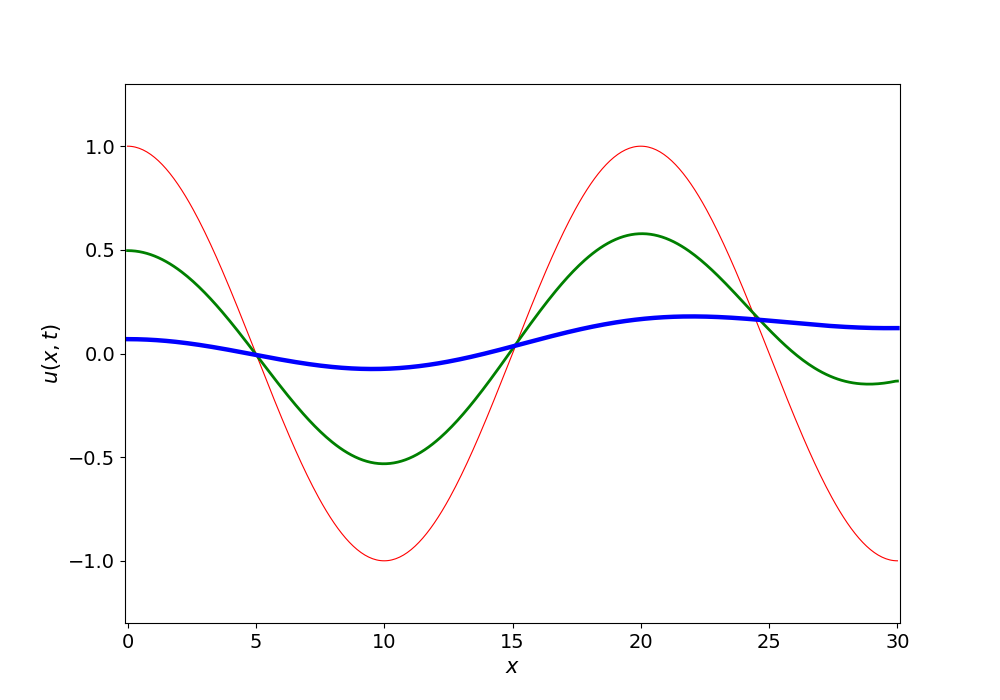

*************************************************
**********PROGRAMM ALUSTAS TÖÖD******************
*************************************************

Arvutan lahendi u sõltuvust ruumikoordinaadist x ajahetkel t= 0 ja panen tulemused massiivi:
Data1.

Arvutan lahendi u sõltuvust ruumikoordinaadist x ajahetkel t= 6 ja panen tulemused massiivi:
Data2.

Arvutan lahendi u sõltuvust ruumikoordinaadist x ajahetkel t= 25 ja panen tulemused massiivi:
Data3.

Joonistan graafiku.

Programmi käivitamisest kuni programmi töö lõpuni kulus 66 sekundit aega.
***********************************************
**********PROGRAMM LÕPETAS TÖÖ*****************
***********************************************


In [2]:
%matplotlib notebook
import numpy as np
from timeit import default_timer as timer
from matplotlib import pyplot as plt

def too_algus():
    print('*************************************************')
    print('**********PROGRAMM ALUSTAS TÖÖD******************')
    print('*************************************************')
    print('')
    
def too_lopp():
    print('***********************************************')
    print('**********PROGRAMM LÕPETAS TÖÖ*****************')
    print('***********************************************')

def Arvutan(hetk):
    return print('Arvutan lahendi u sõltuvust ruumikoordinaadist x ajahetkel t=',hetk,'ja panen tulemused massiivi:')

pii=np.pi
L=30
D=1
N=400# ruumikoordinaadi x väärtuste arv

M=400 #summas liikmete arv

def my_sqrt(argum):
       return argum**(float(1)/2)
    
def ruutu(argum):
    return argum**2


def phi(arg):
       return np.cos((3*pii / L)*arg)    #algtingimus

def mu2O(tau):
       return np.exp(-3*tau)      #rajatingimus rajal x=0
    

def mu2L(tau):
       return 1/(ruutu(tau)+1)  #rajatingimus rajal x=L
    
    
def lambdu(n):
      return ((n*pii)/L)**2  # SL ülesande omaväärtused
    
def F(tau,par3):
     n=par3[0]
     t=par3[1]
     return np.exp((-1)*lambdu(n)*D*(t-tau))

def X(arg,n):
      return np.cos(my_sqrt(lambdu(n))*arg)*my_sqrt((2/L))  # SL ülesande omafunktsioonid lambda<>0

def X0():
      return my_sqrt((1/L))  # SL ülesande omafunktsioon lambda=0 korral

def phiX(arg,n):
     return phi(arg)*X(n,arg)
    
def mu2OF(tau,par4):
      return  D*mu2O(tau)*F(tau,par4)

def mu2LF(tau,par5):
      return  D*mu2L(tau)*F(tau,par5)
    
def integreeri(fm,param,alumine_raja, ulemine_raja, solmede_arv):
    h = (ulemine_raja-alumine_raja)/ solmede_arv
    argument = np.linspace(alumine_raja+ (h/2), ulemine_raja- (h/2), solmede_arv)
    fun= fm(argument,param)
    area = np.sum(fun)* h
    return area

def K1(arg,s):
      return ruutu(X0())*phi(arg)
    
def K20(tau,s):
    return ruutu(X0())*mu2O(tau)

def K2L(tau,s):
    return ruutu(X0())*mu2L(tau)

SolmedeArv=300
xmin=0
xmax=L
xr = np.linspace(xmin, xmax, N)

def uphi(tf,xf,liikmeid_summas):
     sum1=0
     for i in range(liikmeid_summas-1):
         nv=i+1
         I1=integreeri(phiX,nv,xmin, xmax, SolmedeArv)
         parm1=[nv,tf]
         sum1=sum1+X(xf,nv)*F(0,parm1)*I1
     return sum1
    
def umu2L(tf,xf,liikmeid_summas):
     sum2=0
     for i in range(liikmeid_summas-1):
         nv=i+1
         parm2=[nv,tf]
         I2L=integreeri(mu2LF,parm2,0, tf, SolmedeArv)
         sum2=sum2+X(L,nv)*X(xf,nv)*I2L  
     return sum2

def umu20(tf,xf,liikmeid_summas):
     sum3=0
     for i in range(liikmeid_summas-1):
         nv=i+1
         parm3=[nv,tf]
         I20=integreeri(mu2OF,parm3,0, tf, SolmedeArv)
         sum3=sum3+X(0,nv)*X(xf,nv)*I20  
     return sum3

def I0(tf):
     return integreeri(K20,0,0, tf, SolmedeArv)+integreeri(K2L,0,0, tf, SolmedeArv)+integreeri(K1,0,xmin, xmax, SolmedeArv)
    
def un(tff,xff):
       return umu2L(tff,xff,M)-umu20(tff,xff,M) +uphi(tff,xff,M)+I0(tff)   
    

def u(t,s):
     uusmassiiv='Data'+str(s)+'.'
     print(uusmassiiv)
     uusmassiiv= np.linspace(0, 1, N)
     for i in range(N):
        xi=xr[i]
        ti=t
        uusmassiiv[i]=un(ti,xi)
     return uusmassiiv

plt.figure(figsize=(10,7))    
teljestik = plt.axes(xlim=(xmin-0.1, xmax+0.1), ylim=(-1.3, 1.3))

def joon(joonevarv,joonepaksus):
      return  teljestik.plot([], [], color=joonevarv, lw=float(joonepaksus))

plt.rcParams.update({'font.size': 13})               
plt.tick_params(labelsize=14)
plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$u(x,t)$", fontsize=15)

algusaeg = timer()
too_algus()
t0=0
Arvutan(t0)

line, = joon('red',0.8)
line.set_data(xr, u(t0,1))

print('')
t1=6
Arvutan(t1)

line, = joon('green',2.0)
line.set_data(xr, u(t1,2))

print('')
t2=25
Arvutan(t2)

line, = joon('blue',3.2)
line.set_data(xr, u(t2,3))

print('')
print('Joonistan graafiku.')
print('')

plt.show() 
l6petusaeg = timer()
print('Programmi käivitamisest kuni programmi töö lõpuni kulus',round(l6petusaeg - algusaeg),'sekundit aega.')
too_lopp()
 
